In [8]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
plt.style.use('seaborn')

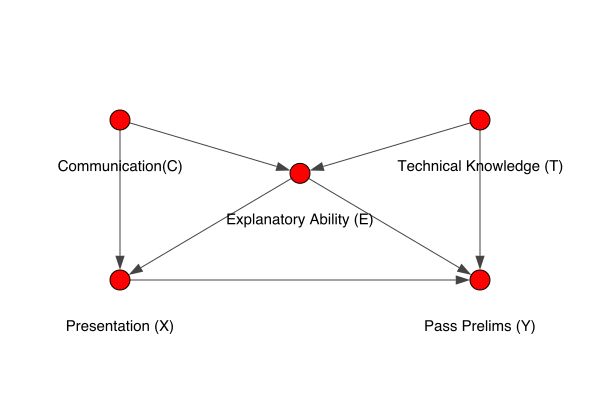

In [9]:
g = ig.Graph.Adjacency(np.array([[0, 0, 1, 1, 0], [0, 0, 1, 0, 1],[0, 0, 0, 1, 1],[0, 0, 0, 0, 1],[0, 0, 0, 0, 0]]).tolist())

g.vs['label'] = ['Communication(C)','Technical Knowledge (T)','Explanatory Ability (E)','Presentation (X)','Pass Prelims (Y)']
g.vs['label_size'] = 15
layout = [(0.0, 0.0), (3.0, 0), (1.5, 1), (0, 3), (3, 3)]
ig.plot(g, 'Images/backdoor_Graph.png',layout=layout,vertex_label_dist=4,vertex_label_angle=4.712,bbox=(600, 400), margin=120)

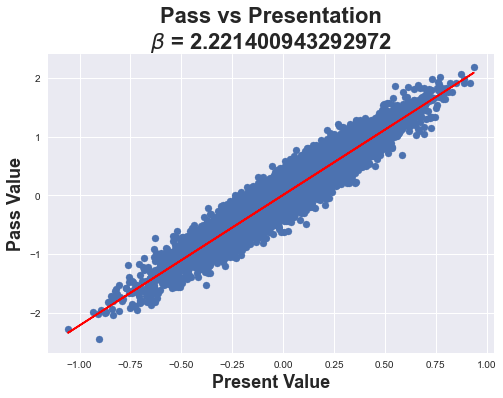

In [10]:
N = 10000

fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

comm = np.random.normal(0,0.1,N)
tech = np.random.normal(0,0.1,N)
ex_able = comm + tech + np.random.normal(0,0.1,N)
present = ex_able + comm + np.random.normal(0,0.1,N)
pass_pre = 1.5 * present + ex_able + tech + np.random.normal(0,0.1,N)

beta, b = np.polyfit(present, pass_pre, 1)

ax.scatter(present,pass_pre)
ax.set_title('Pass vs Presentation\n' + r'$\beta$ = {}'.format(beta),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value',fontweight='bold',fontsize = 18)
ax.plot(present, beta*present+b,c='r')
ax.grid(True)
fig.savefig('Images/backdoor_1.png',bbox_inches='tight')

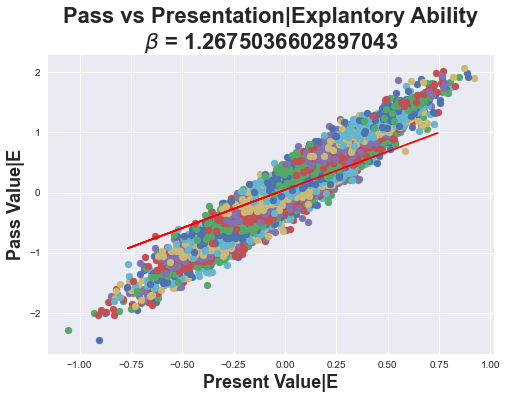

In [11]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

ex_able_bins = np.digitize(ex_able,np.linspace(-0.6,0.6,30) )

betas = np.empty((ex_able_bins.max()))
present_means = np.empty((ex_able_bins.max()))
b = np.empty((ex_able_bins.max()))
betas[:] = np.nan
for i in range(ex_able_bins.max()):
    indices = ex_able_bins == i

    if indices.nonzero()[0].shape[0] == 0: continue

    betas[i], b[i] = np.polyfit(present[indices], pass_pre[indices], 1)
    present_means[i] = np.mean(present[indices])


    ax.scatter(present[indices], pass_pre[indices])


ax.set_title('Pass vs Presentation|Explantory Ability\n' + r'$\beta$ = {}'.format(np.nanmean(betas,0)),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value|E',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value|E',fontweight='bold',fontsize = 18)
ax.plot(present_means, np.nanmean(betas,0)*present_means+np.nanmean(b,0),c='r')
ax.grid(True)
fig.savefig('Images/backdoor_2.png',bbox_inches='tight')

/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


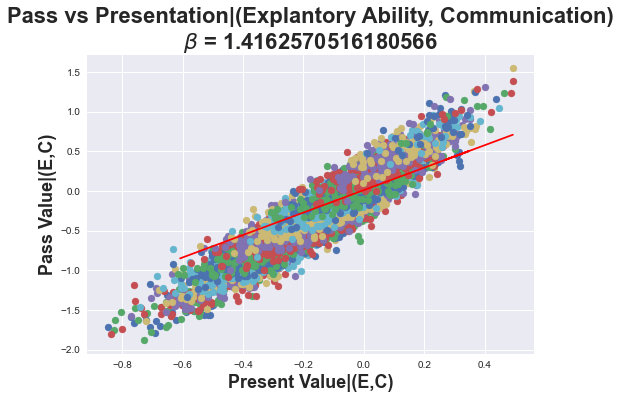

In [12]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

ex_able_bins = np.digitize(ex_able,np.linspace(-0.6,0.6,30) )

betas = []
present_means = []
b_s = []
for i in range(ex_able_bins.max()):
    
    indices_i = ex_able_bins == i
    if indices_i.nonzero()[0].shape[0] == 0: continue
    present_i = present[indices_i]
    pass_pre_i = pass_pre[indices_i]
    comm_i = comm[indices_i]

    comm_bins = np.digitize(comm_i,np.linspace(-0.6,0.6,3))

    for j in range(comm_bins.max()):

        indices_j = comm_bins == j
        if indices_j.nonzero()[0].shape[0] == 0: continue
        present_j = present_i[indices_j]
        present_means.append(np.mean(present_j))
        pass_pre_j = pass_pre_i[indices_j]

        m, b = np.polyfit(present_j, pass_pre_j, 1)
        b_s.append(b)
        betas.append(m)

        ax.scatter(present_j, pass_pre_j)


ax.set_title('Pass vs Presentation|(Explantory Ability, Communication)\n' + r'$\beta$ = {}'.format(np.nanmean(betas,0)),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value|(E,C)',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value|(E,C)',fontweight='bold',fontsize = 18)
ax.plot(present_means, np.array(np.nanmean(betas,0))*present_means + np.nanmean(b_s,0),c='r')
ax.grid(True)
fig.savefig('Images/backdoor_3.png',bbox_inches='tight')

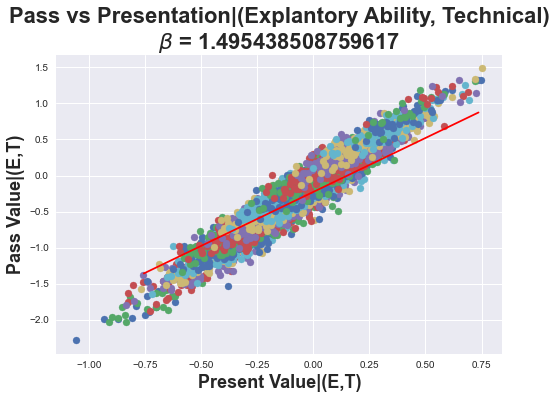

In [13]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

ex_able_bins = np.digitize(ex_able,np.linspace(-0.6,0.6,30) )

betas = []
present_means = []
b_s = []
for i in range(ex_able_bins.max()):
    
    indices_i = ex_able_bins == i
    if indices_i.nonzero()[0].shape[0] == 0: continue
    present_i = present[indices_i]
    pass_pre_i = pass_pre[indices_i]
    tech_i = tech[indices_i]

    tech_bins = np.digitize(tech_i,np.linspace(-0.6,0.6,3))

    for j in range(tech_bins.max()):

        indices_j = tech_bins == j
        if indices_j.nonzero()[0].shape[0] == 0: continue
        present_j = present_i[indices_j]
        present_means.append(np.mean(present_j))
        pass_pre_j = pass_pre_i[indices_j]

        m, b = np.polyfit(present_j, pass_pre_j, 1)
        b_s.append(b)
        betas.append(m)

        ax.scatter(present_j, pass_pre_j)


ax.set_title('Pass vs Presentation|(Explantory Ability, Technical)\n' + r'$\beta$ = {}'.format(np.nanmean(betas,0)),fontweight='bold',fontsize = 22)
ax.set_ylabel('Pass Value|(E,T)',fontweight='bold',fontsize = 18)
ax.set_xlabel('Present Value|(E,T)',fontweight='bold',fontsize = 18)
ax.plot(present_means, np.array(np.nanmean(betas,0))*present_means + np.nanmean(b_s,0),c='r')
ax.grid(True)
fig.savefig('Images/backdoor_4.png',bbox_inches='tight')